In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
blobs = pd.read_csv('DATA/cluster_blobs.csv')

In [3]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<AxesSubplot:xlabel='X1', ylabel='X2'>

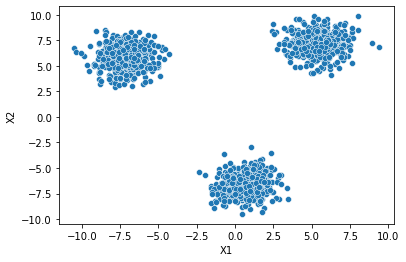

In [4]:
sns.scatterplot(data = blobs, x = "X1" , y = "X2")

In [5]:
moons = pd.read_csv('DATA/cluster_moons.csv')

In [6]:
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


<AxesSubplot:xlabel='X1', ylabel='X2'>

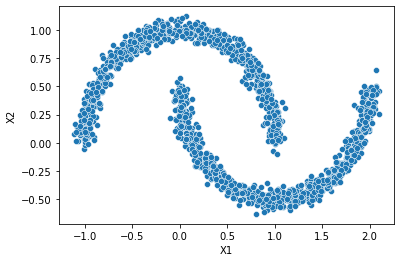

In [7]:
sns.scatterplot(data = moons, x = "X1" , y = "X2")

In [8]:
circles = pd.read_csv('DATA/cluster_circles.csv')

In [9]:
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


<AxesSubplot:xlabel='X1', ylabel='X2'>

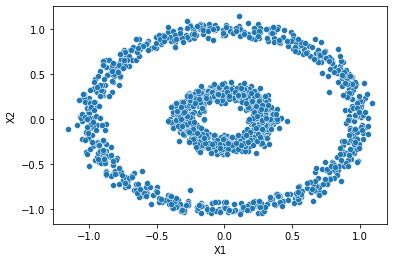

In [10]:
sns.scatterplot(data = circles, x = "X1" , y = "X2")

In [11]:
def display_categories(model , data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data , x = 'X1' , y='X2' , hue = labels , palette='Set1')

In [13]:
from sklearn.cluster import KMeans

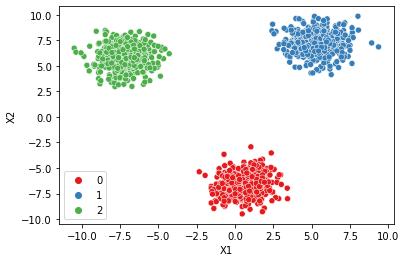

In [15]:
model = KMeans(n_clusters = 3)
display_categories(model , blobs)

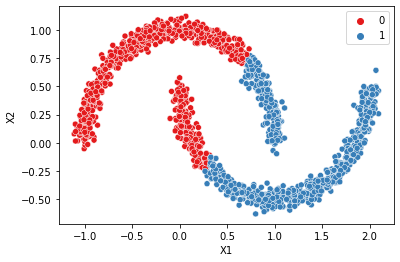

In [17]:
model = KMeans(n_clusters = 2)
display_categories(model , moons)

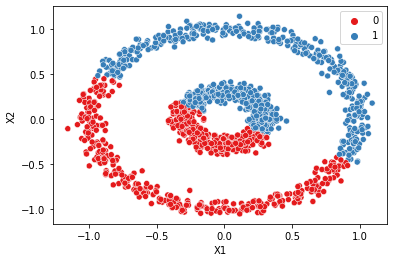

In [18]:
model = KMeans(n_clusters = 2)
display_categories(model , circles)

In [19]:
from sklearn.cluster import DBSCAN

In [20]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. This is the most
 |      important DBSCAN parameter to choose appropriately for your data set
 |      and distance function.
 |  
 |  min_sam

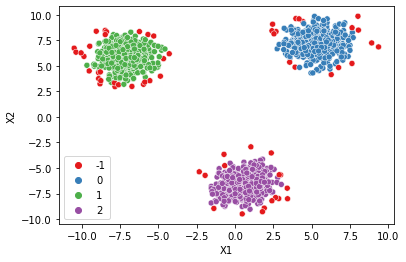

In [21]:
model = DBSCAN()
display_categories(model , blobs) # -1 for outliers

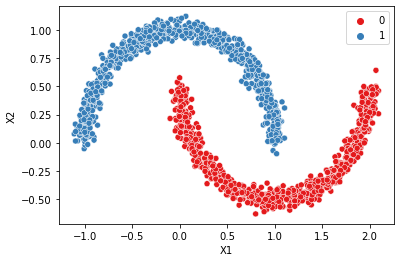

In [26]:
model = DBSCAN(eps=0.15)
display_categories(model , moons) 

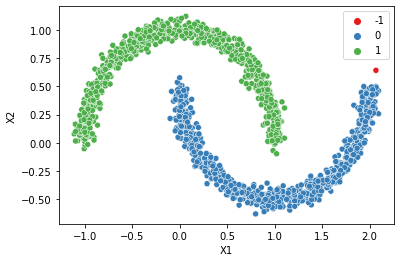

In [27]:
model = DBSCAN(eps=0.10)
display_categories(model , moons) # -1 for outliers

# How to determine proper hyper-parameters
* Elbow method with % of outliers , number of clusters..

In [29]:
def plotDf(df):
    sns.scatterplot(data=df , x = df.columns[0] , y = df.columns[1])

In [28]:
two_blobs = pd.read_csv('DATA/cluster_two_blobs.csv')
two_blobs_outliers = pd.read_csv('DATA/cluster_two_blobs_outliers.csv')

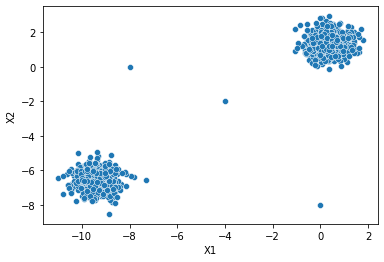

In [30]:
plotDf(two_blobs_outliers)

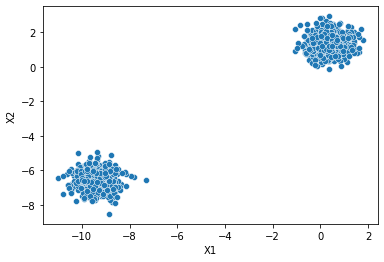

In [31]:
plotDf(two_blobs)

In [33]:
dbscan = DBSCAN()

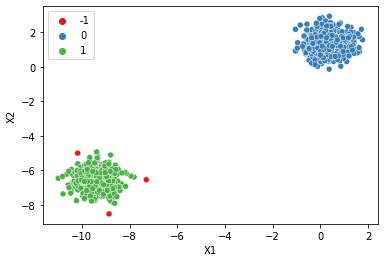

In [34]:
display_categories(dbscan,two_blobs)

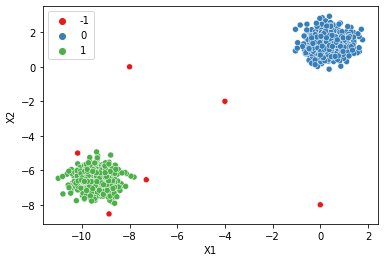

In [35]:
display_categories(dbscan,two_blobs_outliers)

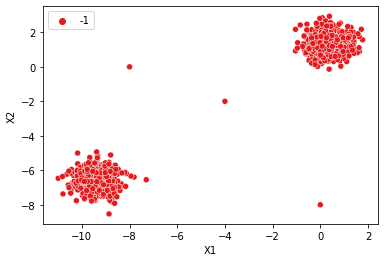

In [37]:
dbscan = DBSCAN(eps=0.001) # with such a small eps, everything is an outlier
display_categories(dbscan,two_blobs_outliers)

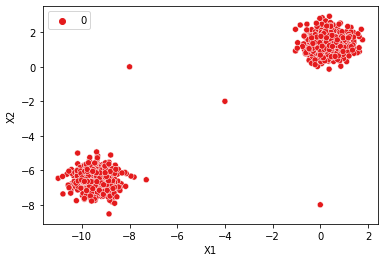

In [38]:
dbscan = DBSCAN(eps=100) # with such a small eps, everything is an outlier
display_categories(dbscan,two_blobs_outliers)

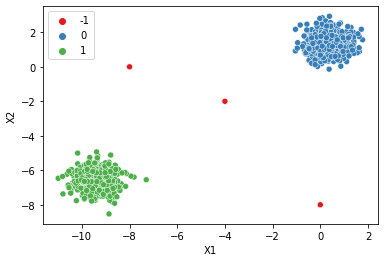

In [39]:
dbscan = DBSCAN(eps=1) # with such a small eps, everything is an outlier
display_categories(dbscan,two_blobs_outliers)

In [40]:
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1])

In [48]:
outlier_pct = []
outlier_num = []

for eps in np.linspace(0.001, 7 , 200):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    outlier_num.append(np.sum(dbscan.labels_ == -1))
    outlier_pct.append(100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_))
    

(0.0, 2.0)

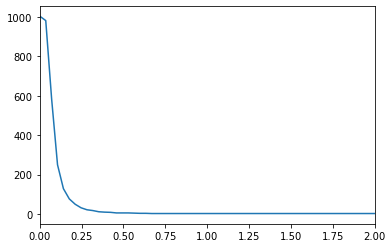

In [49]:
sns.lineplot(x = np.linspace(0.001, 7 , 200) , y = outlier_num)
plt.xlim(0,2)

(0.0, 2.0)

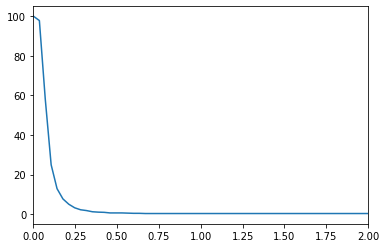

In [50]:
sns.lineplot(x = np.linspace(0.001, 7 , 200) , y = outlier_pct)
plt.xlim(0,2)